In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import Lasso

In [9]:
train = pd.read_excel('../DataSet/train.xlsx')
test = pd.read_excel('../DataSet/testa.xlsx')
Y_test = pd.read_csv('../DataSet/测试集A_答案.csv',header=None)

In [10]:
for i in test.columns:
    if i not in train.columns:
        test = test.drop(i, axis=1)

In [11]:
train = train.to_numpy()
test = test.to_numpy()
Y_test = Y_test.to_numpy()
train = np.delete(train, 0, axis=1)
test = np.delete(test, 0, axis=1)
Y_test = np.delete(Y_test, 0, axis=1)

In [12]:
X_train, Y_train = train[:, :-1], train[:, -1]
X_test = test

In [34]:
lasso = Lasso(alpha=100)  # 创建Lasso回归模型，指定正则化参数alpha为1
lasso.fit(X_train, Y_train)  # 使用训练数据来训练Lasso回归模型

Lasso(alpha=100)

In [35]:
Y_pred = lasso.predict(X_test)  # 使用训练好的Lasso模型对测试数据进行预测
mse = mean_squared_error(Y_test, Y_pred)  # 计算预测值与实际目标变量值之间的均方误差
print("均方误差：", mse)  # 打印均方误差的值，用来评估模型的性能

均方误差： 0.0571736083384563


In [36]:
# 观测lasso回归中L1正则化参数alpha对模型的影响
alpha = []
pre_mse = []
pre_mape = []
for i in [0.5, 1, 1.5, 2, 2.5, 5, 10, 50, 80, 100, 200, 500, 1000, 10000]:
    ridge = Lasso(alpha=i)
    ridge.fit(X_train, Y_train)
    Y_pred = ridge.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    mape = mean_absolute_percentage_error(Y_test, Y_pred)
    alpha.append(i)
    pre_mse.append(mse)
    pre_mape.append(mape)

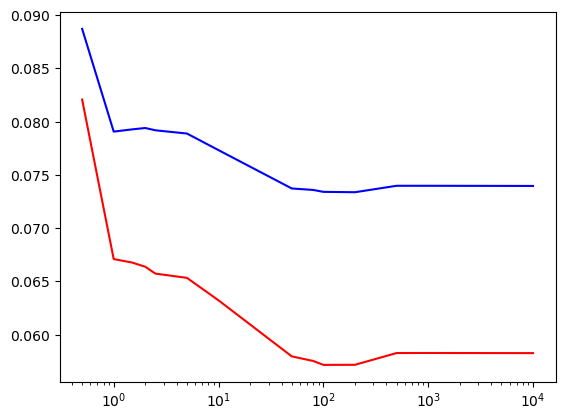

In [37]:
#绘制alpha-mse图像
plt.plot(alpha, pre_mse, color='r')
plt.xscale('log')

#绘制alpha-mape图像
plt.plot(alpha, pre_mape, color='b')
plt.xscale('log')

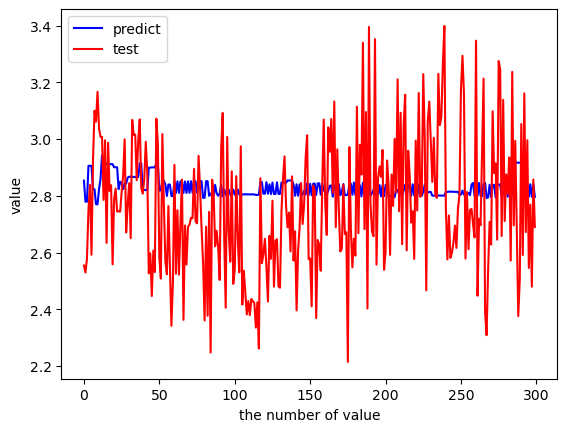

In [38]:
#画图，蓝色为预测值，红色为真实值
plt.figure();
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_test)),Y_test,'r',label="test")
plt.xlabel("the number of value")
plt.ylabel("value")
plt.legend()
plt.show()